In [1]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(42)
m =100
X = 2*np.random.rand(m,1)
y = 4+3*X+np.random.randn(m,1)   #Construct a linearly related X,y data

In [2]:
from sklearn.preprocessing import add_dummy_feature

In [3]:
X_b = add_dummy_feature(X) # add x0 = 1 to each instance
wts_reg = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

In [4]:
>>> wts_reg

array([[4.21509616],
       [2.77011339]])

In [5]:
X_new = np.array([[0],[2]])
X_new_b = add_dummy_feature(X_new)
y_p = X_new_b @ wts_reg
y_p

array([[4.21509616],
       [9.75532293]])

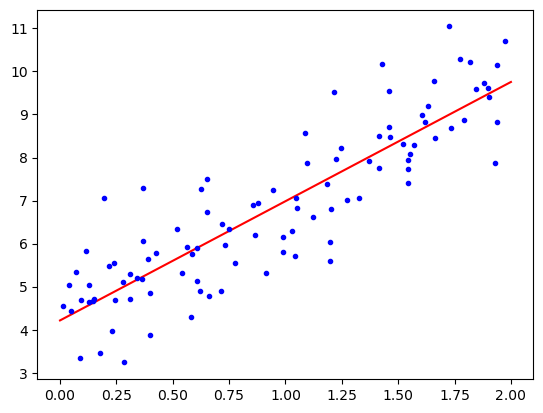

In [6]:
plt.plot(X_new, y_p, "r-",label="predictions")

plt.plot(X,y,"b.")

In [7]:
#Performing lin. reg. from scikit-Learn is straightforward
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
print(lin_reg.intercept_, lin_reg.coef_)
print(lin_reg.predict(X_new))

[4.21509616] [[2.77011339]]
[[4.21509616]
 [9.75532293]]


In [8]:
#Computational Complexity --> matrix inversion O(n^3)

In [9]:
#Polynomial Regression

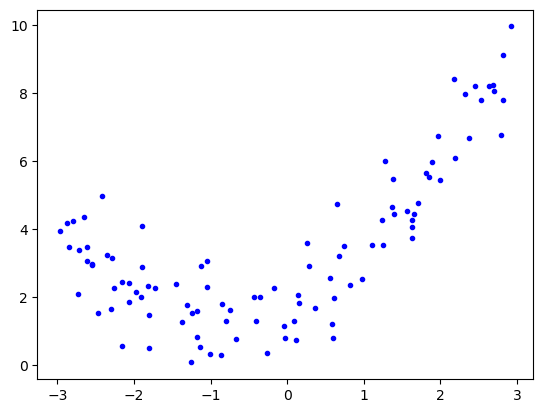

In [10]:
np.random.seed(42)
m = 100
X = 6*np.random.rand(m,1)-3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.plot(X,y,"b.")

In [11]:
#Use Scikit-Learn's PolynomialFeatures Class
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])

[-0.75275929]
[-0.75275929  0.56664654]


In [12]:
#above contains original feature of X plus the square of the feature
# Now fit a linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X_poly,y)

LinearRegression()

In [13]:
print(lin_reg.intercept_,lin_reg.coef_)

[1.78134581] [[0.93366893 0.56456263]]


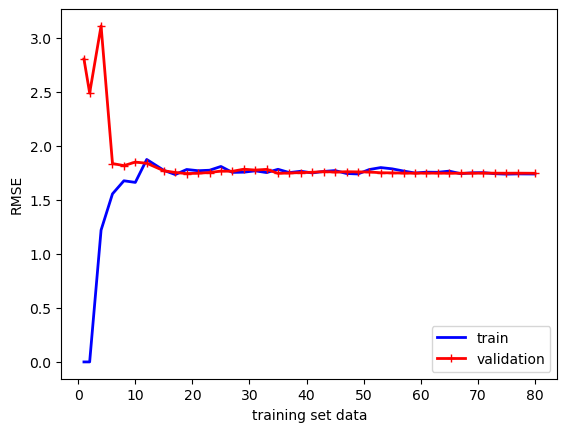

In [14]:
#learning curves
from sklearn.model_selection import learning_curve
train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(),X,y,train_sizes=np.linspace(0.01,1.0,40), cv=5, 
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot (train_sizes, train_errors, "b-", linewidth=2, label="train")
plt.plot (train_sizes, valid_errors, "r-+", linewidth=2, label="valid")
plt.xlabel("training set data")
plt.ylabel("RMSE")
plt.legend(["train", "validation"], loc="lower right")
plt.show()

#Notice that it's a linear fit and therefore underfiting the data
#notice that RMSE is not small enough

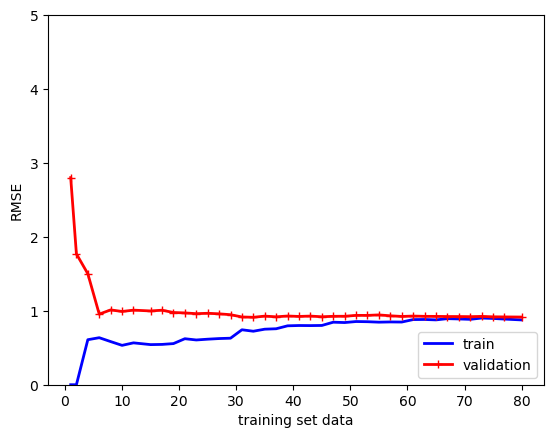

In [18]:
from sklearn.pipeline import make_pipeline
polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    LinearRegression())

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X,y,train_sizes=np.linspace(0.01,1.0,40), cv=5, 
    scoring="neg_root_mean_squared_error")
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot (train_sizes, train_errors, "b-", linewidth=2, label="train")
plt.plot (train_sizes, valid_errors, "r-+", linewidth=2, label="valid")
plt.ylim(0,5)
plt.xlabel("training set data")
plt.ylabel("RMSE")
plt.legend(["train", "validation"], loc="lower right")
plt.show()